## Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'matplotlib'

```
Remnant/
  Marcus_Aurelius_Arch/
  Tripoli_Clock_Tower/
  Qarji_Mosque/
  red_serail/
```

## Connect with Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Data From Google Drive

In [3]:
import pathlib
from torchvision.datasets import ImageFolder
from torchvision import transforms
data_path = "/content/drive/MyDrive/Colab Notebooks/Remnant"
target_label = ['Marcus_Aurelius_Arch','red_serail', 'Qarji_Mosque','Tripoli_Clock_Tower' ]

data_dir = ImageFolder(data_path, transform=transforms.ToTensor())

In [4]:
data_dir

Dataset ImageFolder
    Number of datapoints: 409
    Root location: /content/drive/MyDrive/Colab Notebooks/Remnant
    StandardTransform
Transform: ToTensor()

In [5]:
#  Data information
 for base, dirs, files in os.walk(data_path):
        for image, imgdir , imgfil in os.walk(data_path):
          #  print('Searching in : ' ,image)

          Num = len(imgfil)
          if Num < 500 :
            print(image ,"--->", Num,imgfil)
            for path in imgfil :
               print(path)
              #  for path2 in imgfil :
              #      print(path2)
              #      break
               break
        break


/content/drive/MyDrive/Colab Notebooks/Remnant ---> 0 []
/content/drive/MyDrive/Colab Notebooks/Remnant/Tripoli_Clock_Tower ---> 45 ['برجالساعةطرابلس0.jpeg', 'برجالساعةطرابلس1.jpeg', 'برجالساعةطرابلس2.jpeg', 'برجالساعةطرابلس3.jpeg', 'برجالساعةطرابلس4.jpeg', 'برجالساعةطرابلس5.jpeg', 'برجالساعةطرابلس8.jpeg', 'برجالساعةطرابلس10.jpeg', 'برجالساعةطرابلس11.jpeg', 'برجالساعةطرابلس16.jpeg', 'برجالساعةطرابلس15.jpeg', 'برجالساعةطرابلس18.jpeg', 'برجالساعةطرابلس17.jpeg', 'برجالساعةطرابلس22.jpeg', 'برجالساعةطرابلس24.jpeg', 'برجالساعةطرابلس26.jpeg', 'برجالساعةطرابلس25.jpeg', 'برجالساعةطرابلس27.jpeg', 'برجالساعةطرابلس28.jpeg', 'برجالساعةطرابلس29.jpeg', 'برجالساعةطرابلس30.jpeg', 'برجالساعةطرابلس32.jpeg', 'برجالساعةطرابلس34.jpeg', 'برجالساعةطرابلس36.jpeg', 'برجالساعةطرابلس39.jpeg', 'برجالساعةطرابلس40.jpeg', 'برجالساعةطرابلس56.jpeg', 'برجالساعةطرابلس58.jpeg', 'برجالساعةطرابلس61.jpeg', 'برجالساعةطرابلس62.jpeg', 'برجالساعةطرابلس63.jpeg', 'برجالساعةطرابلس65.jpeg', 'برجالساعةطرابلس69.jpeg', 'برجالساعةطرابلس

In [ ]:
#check images of the dataset for first 20 images
fig = plt.figure(figsize=(25, 4))

for i in range(20):
    image, label = data_dir[i]
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks = [])
    ax.imshow(image.permute(1,2,0))
    ax.set_title(target_label[label], color='red')

## Preprosseing

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 405 files belonging to 4 classes.
Using 324 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 405 files belonging to 4 classes.
Using 81 files for validation.


In [10]:
class_names = train_ds.class_names
# class_names

['Marcus_Aurelius_Arch', 'Qarji_Mosque', 'Tripoli_Clock_Tower', 'red_serail']

## Visualize the data

Here are the first nine images from the training dataset:

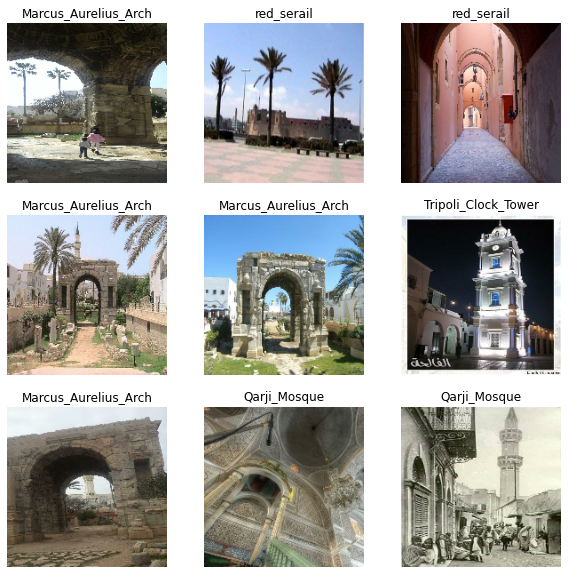

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


##  Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Create the model


In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding="valid",  activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding="valid",  activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='valid',  activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(num_classes, name="outputs")
])

## Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                  

## Train the model

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Visualize training results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Tripoli_-_Eingang_zum_Nationalmuseum.jpg/220px-Tripoli_-_Eingang_zum_Nationalmuseum.jpg"
path = tf.keras.utils.get_file('imge', origin=url)

img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

32768/21502 [=============================================] - 0s 1us/step
This image most likely belongs to red_serail with a 90.07 percent confidence.


## Saving model

In [ ]:
model.save('Model.h5')